# Model Development 1: Linear Regression

In [2]:
# Import libraries for data manipulation and visualization
import numpy as np 
import os
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
# Set the numbers of columns to be displayed in the output
pd.set_option('display.max_columns', None)

### Approach: Linear Regression

+ Data Preparation: splitting models into training and testing sets
+ Feature Engineering
+ Model Building: building simple and multivariate linear regression model from scratch 
+ Model Training: train the model with chosen number of datasamples
+ Model Evaluation: evaluate the performance of model with fixed paramters
+ Model Tuning with Hyperparamters: re-train and re-evaluate the model with hyperparamters

In [3]:
# Load the dataset from phase 3
path = "D:\Projectwork Platform\MEP-Machine-Learning\Laptop_Price_Prediction\dataset"
csv_file = os.path.join(path, "ebay_laptop_data_phase3.csv")
laptop_df = pd.read_csv(csv_file)
laptop_df.head()

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\mian_\AppData\Local\Temp\ipykernel_8360\3772760037.py:2: SyntaxWarning: invalid escape sequence '\P'
  path = "D:\Projectwork Platform\MEP-Machine-Learning\Laptop_Price_Prediction\dataset"


,Brand,Price,Color,GPU,Processor Speed,Display Width,Display Height,OS,Storage Type,Hard Drive Capacity,SSD Capacity,Screen Size (cm),Ram Size,Price per Screen Size,Price per Display Height,Price per Display Width,Bluetooth,Touchscreen,WiFi,Webcam
0,dell,400.00,black,intel,4.2,1920.0,1080.0,windows,ssd,2000.00,205.95,14.0,5.98,28.571429,0.370370,0.208333,Yes,No,Yes,Yes
1,dell,175.00,black,intel,2.4,1920.0,1080.0,windows,ssd,500.00,500.00,14.0,16.00,12.500000,0.162037,0.091146,Yes,Yes,Yes,Yes
2,hp,85.00,black,intel,2.4,1366.0,768.0,chrome,emmc,16.00,205.95,11.6,4.00,7.327586,0.110677,0.062225,Yes,No,Yes,Yes
3,dell,101.25,other,other,1.4,1366.0,768.0,windows,ssd,98.89,256.00,12.5,8.00,8.100000,0.131836,0.074122,No,No,Yes,Yes
4,acer,50.00,black,other,1.6,1366.0,768.0,chrome,ssd,98.89,16.00,11.6,4.00,4.310345,0.065104,0.036603,Yes,Yes,No,No


## Data Preparation

+ Data splitting: splitting into training and testing sets
+ Feature Scaling: scaling features using StandardScaling
+ Feature Encoding: encoding categorical features using label encoding


In [4]:
# import dependencies for preparing data 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

In [5]:
# Filter out irrelevant data
laptop_df = laptop_df.drop(columns=["Brand"], axis=1)

# Split the dataset into testing and training sets
laptopX = laptop_df.drop(columns=["Price"], axis=1)
laptopY = laptop_df["Price"]

xtrain, xtest, ytrain, ytest = train_test_split(laptopX, laptopY, test_size=0.2, random_state=42)
print(f"Training set: x={xtrain.shape}, y={ytrain.shape}")
print(f"Test set: x={xtest.shape}, y={ytest.shape}")

Training set: x=(1976, 18), y=(1976,)
Test set: x=(495, 18), y=(495,)


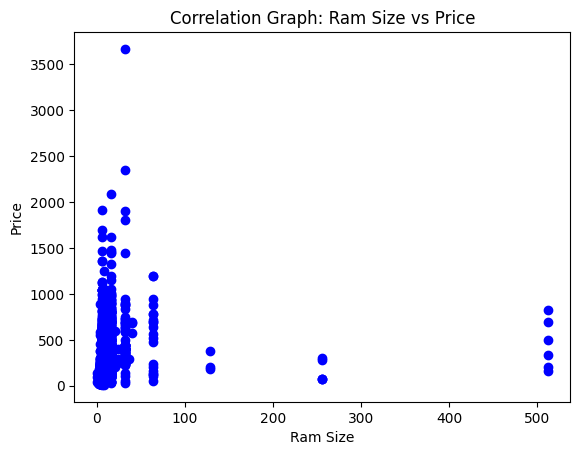

In [6]:
# Visualize the data distribution: target variable and features
def correlation_graph(x,y = "Price", dataX = xtrain, dataY = ytrain, color="blue"):
    feature = dataX[x]
    target = dataY

    plt.scatter(feature, target, color=color)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"Correlation Graph: {x} vs {y}")
    plt.show()

correlation_graph("Ram Size")

## Model Building

In [7]:
# Import Linear regression model 
from linear_regression import SimpleLinearRegression

In [ ]:
# 

Techniques for model evaluation
+ Evaluation Metrics
+ Hyperparameter Tuning

In [8]:
# Import dependencies for implementing evaluation metrics 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Evaluating models based on: 
+ 1 chosen input feature vs price price  
+ 2 input features vs laptop price
+ more than 2 input features vs laptop price 

In [15]:
# Evaluate: 1 chose feature vs price (Horsepower)
laptop_df.head()

,Price,Color,GPU,Processor Speed,Display Width,Display Height,OS,Storage Type,Hard Drive Capacity,SSD Capacity,Screen Size (cm),Ram Size,Price per Screen Size,Price per Display Height,Price per Display Width,Bluetooth,Touchscreen,WiFi,Webcam
0,400.00,black,intel,4.2,1920.0,1080.0,windows,ssd,2000.00,205.95,14.0,5.98,28.571429,0.370370,0.208333,Yes,No,Yes,Yes
1,175.00,black,intel,2.4,1920.0,1080.0,windows,ssd,500.00,500.00,14.0,16.00,12.500000,0.162037,0.091146,Yes,Yes,Yes,Yes
2,85.00,black,intel,2.4,1366.0,768.0,chrome,emmc,16.00,205.95,11.6,4.00,7.327586,0.110677,0.062225,Yes,No,Yes,Yes
3,101.25,other,other,1.4,1366.0,768.0,windows,ssd,98.89,256.00,12.5,8.00,8.100000,0.131836,0.074122,No,No,Yes,Yes
4,50.00,black,other,1.6,1366.0,768.0,chrome,ssd,98.89,16.00,11.6,4.00,4.310345,0.065104,0.036603,Yes,Yes,No,No


## Model Packaging

In [16]:
import joblib

In [17]:
# Save the linear regression model 
joblib.dump(lin_model, "linear_model1.pkl")

['linear_model1.pkl']